#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 03
**CH03B Comparing hotel prices in Europe: Vienna vs. London**
eight-income-distributions  dataset

version 1.0 2021-05-05

### Import libraries and set folders

In [3]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mizani.formatters import percent_format
from plotnine import *

from plotnine import *
from plotnine.scales import scale_x_continuous, scale_y_continuous
from plotnine.labels import labs
from plotnine.themes import theme_bw
from plotnine.positions import position_dodge
from mizani.formatters import percent_format
import pandas as pd
import numpy as np

warnings.filterwarnings("ignore")

In [4]:
# load vienna
vienna = pd.read_csv("/workspaces/codespaces-jupyter/data/hotels-vienna.csv")
#vienna = pd.read_csv("https://osf.io/y6jvb/download")

In [5]:
vienna.columns

Index(['country', 'city_actual', 'rating_count', 'center1label',
       'center2label', 'neighbourhood', 'price', 'city', 'stars', 'ratingta',
       'ratingta_count', 'scarce_room', 'hotel_id', 'offer', 'offer_cat',
       'year', 'month', 'weekend', 'holiday', 'distance', 'distance_alter',
       'accommodation_type', 'nnights', 'rating'],
      dtype='object')

In [11]:
vienna.distance.describe()

count    428.000000
mean       1.658879
std        1.595673
min        0.000000
25%        0.700000
50%        1.300000
75%        2.000000
max       13.000000
Name: distance, dtype: float64

In [16]:
median_distance = vienna['distance'].median()
median_distance

np.float64(1.3)

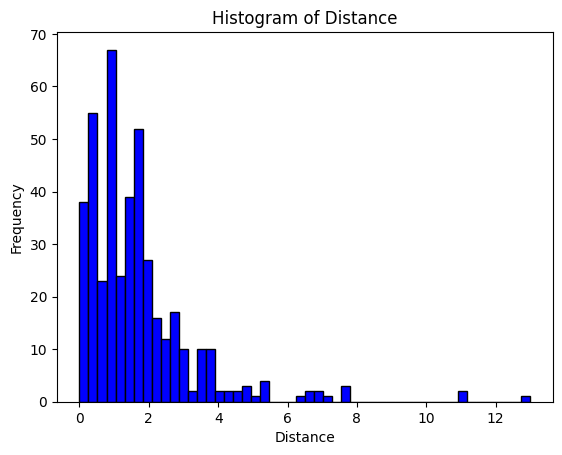

In [15]:
plt.hist(vienna['distance'], bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Distance')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

In [17]:
vienna['distance_cat'] = np.where(vienna['distance'] <=3, 'close', 'far')

In [20]:
vienna.distance_cat.unique()

array(['close', 'far'], dtype=object)

In [26]:
# Summary statistics for 'close' and 'far' distance categories
summary_stats = vienna.groupby('distance_cat').describe().T
summary_stats

distance_cat             close         far
rating_count count  343.000000   50.000000
             mean   161.655977  109.720000
             std    191.087970  187.759294
             min      1.000000    1.000000
             25%     30.000000   17.250000
...                        ...         ...
rating       min      1.000000    2.700000
             25%      3.700000    3.500000
             50%      4.100000    3.700000
             75%      4.400000    4.000000
             max      5.000000    4.800000

[128 rows x 2 columns]

In [29]:
# Find the minimum value of 'distance' where 'distance_cat' is 'far'
far_stat = vienna[vienna['distance_cat'] == 'far']['distance'].describe()
far_stat

count    52.000000
mean      4.940385
std       2.163354
min       3.100000
25%       3.600000
50%       4.000000
75%       5.325000
max      13.000000
Name: distance, dtype: float64

In [31]:
# Find the minimum value of 'distance' where 'distance_cat' is 'far'
close_stat = vienna[vienna['distance_cat'] == 'close']['distance'].describe()
close_stat

count    376.000000
mean       1.205053
std        0.750361
min        0.000000
25%        0.600000
50%        1.100000
75%        1.700000
max        3.000000
Name: distance, dtype: float64

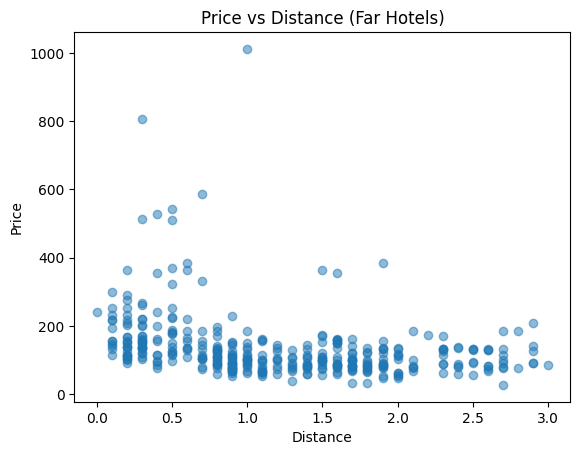

In [39]:
vienna_close = vienna[vienna['distance_cat'] == 'close']

plt.scatter(vienna_close['distance'], vienna_close['price'], alpha=0.5)
plt.title('Price vs Distance (Far Hotels)')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()

### 1. Covariance and Coorelation btw distance (far / close) and price

In [43]:
close_cov = vienna_close["price"].cov(vienna_close["distance"])
close_cov

np.float64(-22.448580851063824)

In [ ]:
close_cov = vienna_close["distance"].cov(vienna_close["price"])
close_cov

np.float64(-22.448580851063824)

In [44]:
far_cov = vienna_far["price"].cov(vienna_far["distance"])
far_cov

np.float64(-0.8304675716440417)

In [49]:
close_corr_price = vienna_close["distance"].corr(vienna_close["price"])
close_corr_price

np.float64(-0.3125201698250338)

In [50]:
far_corr_price = vienna_far["distance"].corr(vienna_far["price"])
far_corr_price

np.float64(-0.008206345833321995)

### 2. Covariance and Coorelation btw distance (far / close) and stars

In [52]:
close_corr_stars = vienna_close["distance"].corr(vienna_close["stars"])
close_corr_stars

np.float64(-0.33453699022351263)

In [53]:
far_corr_stars = vienna_far["distance"].corr(vienna_far["stars"])
far_corr_stars

np.float64(0.040144500595287895)

In [54]:
far_cov_stars = vienna_far["distance"].cov(vienna_far["stars"])
far_cov_stars

np.float64(0.05222473604826545)

### 3. Covariance and Coorelation btw distance (far / close) and ratings

In [55]:
close_corr_rat = vienna_close["distance"].corr(vienna_close["rating_count"])
close_corr_rat

np.float64(-0.14621170910491857)

In [56]:
far_corr_rat = vienna_far["distance"].corr(vienna_far["rating_count"])
far_corr_rat

np.float64(0.37504386313730986)

In [57]:
far_cov_rat = vienna_far["distance"].cov(vienna_far["rating_count"])
far_cov_rat

np.float64(154.47706122448974)

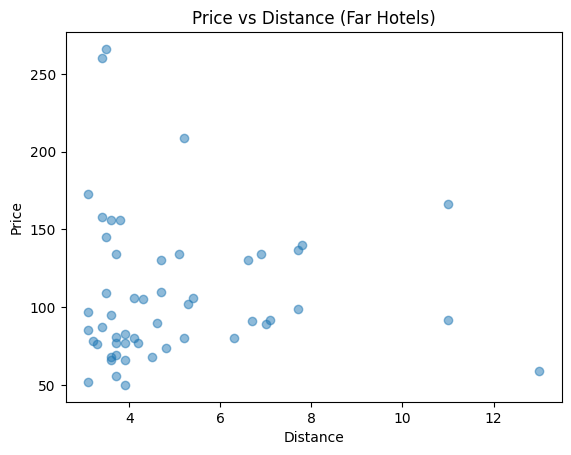

In [38]:
vienna_far = vienna[vienna['distance_cat'] == 'far']

plt.scatter(vienna_far['distance'], vienna_far['price'], alpha=0.5)
plt.title('Price vs Distance (Far Hotels)')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()

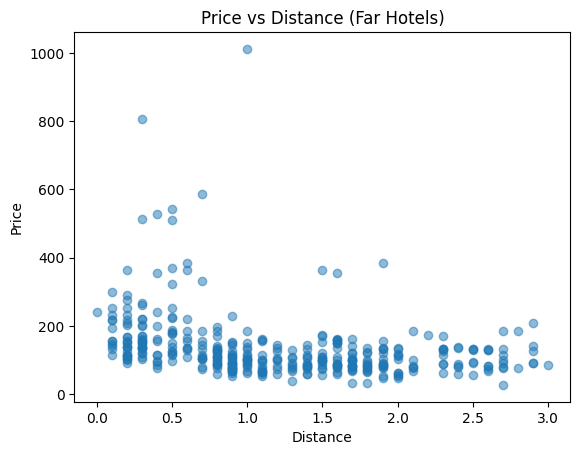

In [60]:
vienna_close = vienna[vienna['distance_cat'] == 'close']

plt.scatter(vienna_close['distance'], vienna_close['price'], alpha=0.5)
plt.title('Price vs Distance (Far Hotels)')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()

In [ ]:
(
    ggplot(vienna_close, aes(x="", y="Percent", fill="perf2"))
    + geom_bar(
        stat="identity", position="fill", width=0.6, color="white", size=0.5, alpha=0.8
    )
    + scale_y_continuous(
        expand=(0, 0),
        limits=(0, 1),
        breaks=np.arange(0, 1.1,0.2),
        labels=percent_format(),
    )
    + labs(x="Firm size (employment), 3 bins", y="Percent")
    + theme_bw()
    + theme(legend_position="right")
    + scale_fill_manual(
        values=("purple", "#2e47af", "#017B92", "darkgreen", "orange"), name=" "
    )
)

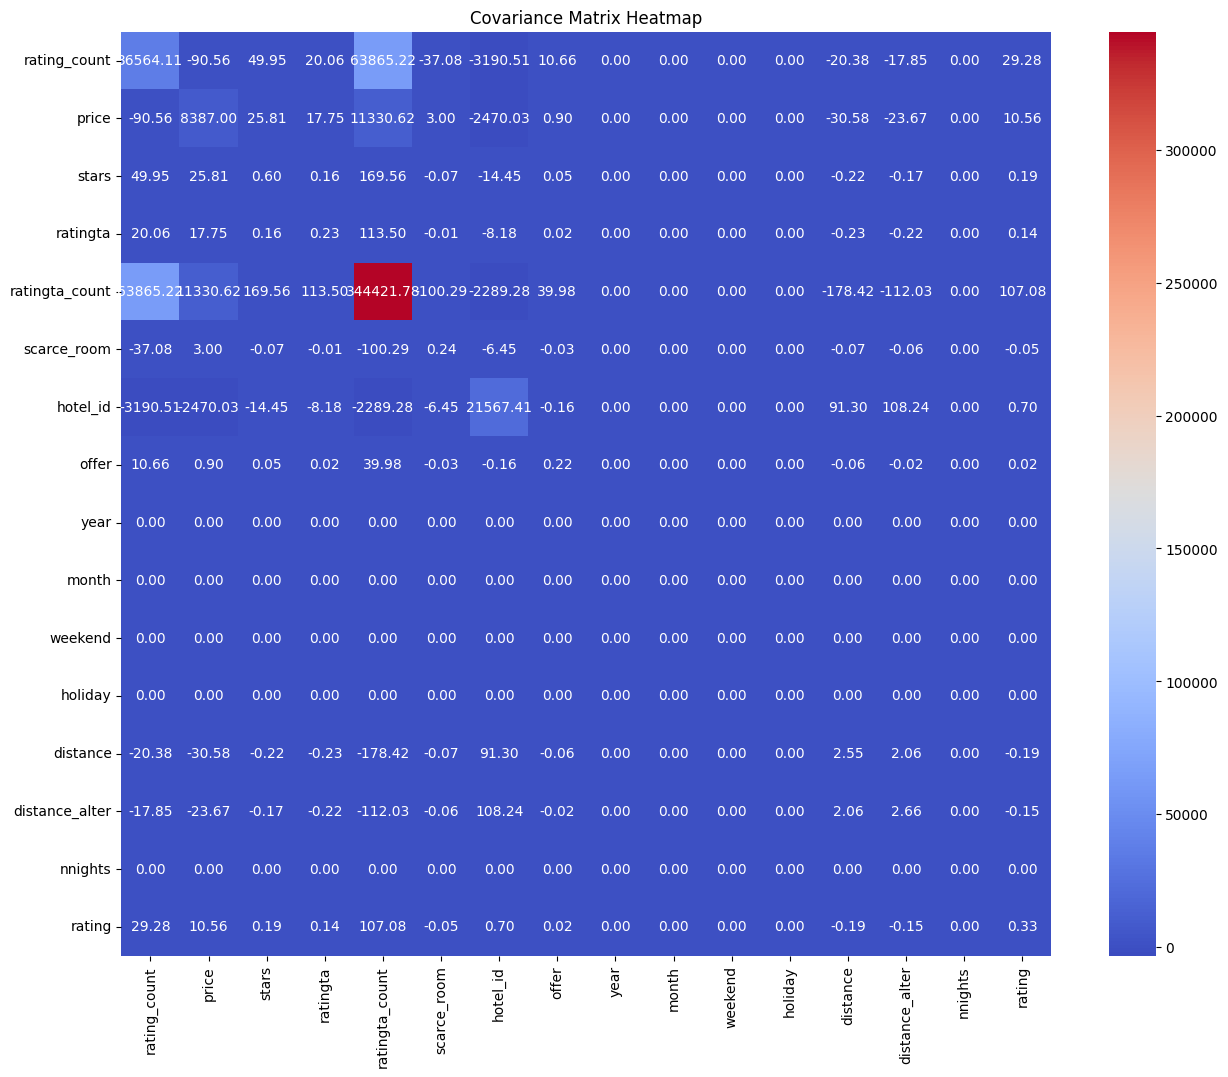

In [ ]:
import seaborn as sns

# Compute covariance matrix for numerical columns
cov_matrix = vienna_far.select_dtypes(include=[np.number]).cov()

# Plot the covariance matrix as a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Covariance Matrix Heatmap")
plt.show()